## IMDB, binary classification example
- Page 68 and after
- More about the data used here at [this post](https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456).
- Evaluate the comments made on a movie to see if it was good or bad (positive:1, or negative:0)

In [52]:
from keras.datasets import imdb

In [53]:
INDEX_FROM = 0
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, index_from=INDEX_FROM)

In [54]:
print("First set of train data:\n{}\n({} elements)".format(train_data[0], len(train_data[0])))

First set of train data:
[1, 11, 19, 13, 40, 527, 970, 1619, 1382, 62, 455, 4465, 63, 3938, 1, 170, 33, 253, 2, 22, 97, 40, 835, 109, 47, 667, 2, 6, 32, 477, 281, 2, 147, 1, 169, 109, 164, 2, 333, 382, 36, 1, 169, 4533, 1108, 14, 543, 35, 10, 444, 1, 189, 47, 13, 3, 144, 2022, 16, 11, 19, 1, 1917, 4610, 466, 1, 19, 68, 84, 9, 13, 40, 527, 35, 73, 12, 10, 1244, 1, 19, 14, 512, 14, 9, 13, 623, 15, 2, 2, 59, 383, 9, 5, 313, 5, 103, 2, 1, 2220, 5241, 13, 477, 63, 3782, 30, 1, 127, 9, 13, 35, 616, 2, 22, 121, 48, 33, 132, 45, 22, 1412, 30, 3, 19, 9, 212, 25, 74, 49, 2, 11, 404, 13, 79, 2, 5, 1, 104, 114, 5949, 12, 253, 1, 2, 4, 3763, 2, 720, 33, 68, 40, 527, 473, 23, 397, 314, 43, 4, 1, 2, 1026, 10, 101, 85, 1, 378, 12, 294, 95, 29, 2068, 53, 23, 138, 3, 191, 7483, 15, 1, 223, 19, 18, 131, 473, 23, 477, 2, 141, 27, 5532, 15, 48, 33, 25, 221, 89, 22, 101, 1, 223, 62, 13, 35, 1331, 85, 9, 13, 280, 2, 13, 4469, 110, 100, 29, 12, 13, 5342, 16, 175, 29]
(218 elements)


In [55]:
print("First 10 train labels:\n{}".format(train_labels[0:10]))

First 10 train labels:
[1 0 0 1 0 0 1 0 1 0]


In [56]:
max([max(sequence) for sequence in train_data])  # should be 9999, 10000 - 1.

9999

In [88]:
word_index = imdb.get_word_index()
# print("Word Index:\n{}".format(word_index))

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print('decoded_review:\n{}'.format(decoded_review))
print("=============================")
word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2

id_to_word = {value:key for key, value in word_index.items()}
print(' '.join(id_to_word[id] for id in train_data[0] ))
print("=============================")

decoded_review:
? in with i like horrible business chinese charm would killer waited which explosion ? going at fun ? film make like lame character has novel ? a all final sense ? real ? find character nothing ? second perhaps they ? find valuable cover this city an br overall ? horror has i ? should shop was in with ? delightful 00 despite ? with their people is i like horrible an well it br garbage ? with this genre this is i taken that ? ? she sex is and house and after ? ? product bud i final which returned be ? does is i an annoying ? film where if at man it's film sent be ? with is comedy you than some ? in perfect i get ? and ? think plot windows it fun ? ? the lou ? sequence at their like horrible wanted on getting night just the ? ? rich br any other ? couple it someone then he decade more on why ? can't ajay that ? family with for still wanted on final ? such his lindsay that if at you interesting how film any ? family would i an g other is i once ? i boot seen could he it i 

In [113]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# print("train_data[0]: {}".format(train_data[0]))
# print("x_train[0]: {}".format(x_train[0]))


Len Train Data: 25000
train_data[0]: [1, 11, 19, 13, 40, 527, 970, 1619, 1382, 62, 455, 4465, 63, 3938, 1, 170, 33, 253, 2, 22, 97, 40, 835, 109, 47, 667, 2, 6, 32, 477, 281, 2, 147, 1, 169, 109, 164, 2, 333, 382, 36, 1, 169, 4533, 1108, 14, 543, 35, 10, 444, 1, 189, 47, 13, 3, 144, 2022, 16, 11, 19, 1, 1917, 4610, 466, 1, 19, 68, 84, 9, 13, 40, 527, 35, 73, 12, 10, 1244, 1, 19, 14, 512, 14, 9, 13, 623, 15, 2, 2, 59, 383, 9, 5, 313, 5, 103, 2, 1, 2220, 5241, 13, 477, 63, 3782, 30, 1, 127, 9, 13, 35, 616, 2, 22, 121, 48, 33, 132, 45, 22, 1412, 30, 3, 19, 9, 212, 25, 74, 49, 2, 11, 404, 13, 79, 2, 5, 1, 104, 114, 5949, 12, 253, 1, 2, 4, 3763, 2, 720, 33, 68, 40, 527, 473, 23, 397, 314, 43, 4, 1, 2, 1026, 10, 101, 85, 1, 378, 12, 294, 95, 29, 2068, 53, 23, 138, 3, 191, 7483, 15, 1, 223, 19, 18, 131, 473, 23, 477, 2, 141, 27, 5532, 15, 48, 33, 25, 221, 89, 22, 101, 1, 223, 62, 13, 35, 1331, 85, 9, 13, 280, 2, 13, 4469, 110, 100, 29, 12, 13, 5342, 16, 175, 29]
x_train[0]: [0. 1. 1. ... 0. 0

In [59]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [60]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Building the Model (Network)

In [61]:
from keras import models
from keras import layers

activation = 'relu'  
model = models.Sequential()
model.add(layers.Dense(16, activation=activation, input_shape=(10000,)))   
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##### Configuring the optimizers

In [63]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

##### Validating the approach

In [65]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Let's go train it

In [66]:
model.compile(optimizer='rmsprop',  # mse or rmsprop
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 434us/step - loss: 0.5751 - acc: 0.7199 - val_loss: 0.4490 - val_acc: 0.8572
Epoch 2/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.3538 - acc: 0.8947 - val_loss: 0.3251 - val_acc: 0.8864
Epoch 3/20
15000/15000 [============================

In [67]:
history_dict = history.history
print("Keys {}".format(history_dict.keys()))

acc = history_dict['acc']

Keys dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


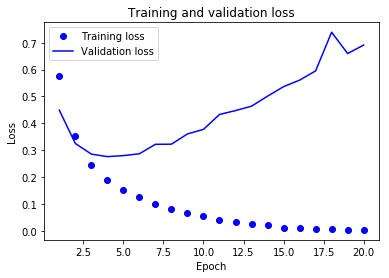

In [68]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' = "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' = "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

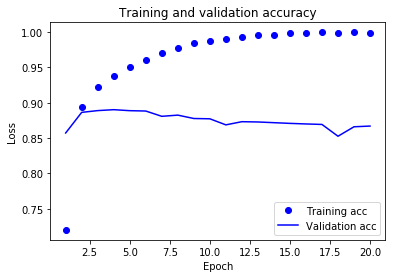

In [69]:
plt.clf()  # Clear Figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # 'bo' = "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')  # 'b' = "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Retraining the model from scratch
- Try changing activation type ('relu', 'tanh')
- Try changing the number of layers
- Tray changing the width of the layers (16, 32, 64)
- Tri changing the optimizer ('rmsprop', 'mse')

In [70]:
activation = 'relu'    # relu, tanh?
optimizer = 'rmsprop'  # 'rmsprop, mse, adam?'
width = 16             # 4, 8, 16, 32, 64, ... 512?
hidden_layers = 1      # 1, 2, 3?

model = models.Sequential()
model.add(layers.Dense(width, activation=activation, input_shape=(10000,)))  
for i in range(hidden_layers):
    model.add(layers.Dense(width, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

epochs = 20
history = model.fit(x_train, 
                    y_train,
                    epochs=epochs,  
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print("Evaluation results: {}".format(results))
print("Loss value {}, metric value {}".format(results[0], results[1]))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 265us/step - loss: 0.4348 - acc: 0.8252 - val_loss: 0.2699 - val_acc: 0.9168
Epoch 2/20
25000/25000 [==============================] - 6s 255us/step - loss: 0.2527 - acc: 0.9111 - val_loss: 0.1904 - val_acc: 0.9412
Epoch 3/20
25000/25000 [============================

###### Redraw the graphs

In [71]:
history_dict = history.history
print("Keys {}".format(history_dict.keys()))

acc = history_dict['acc']

Keys dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


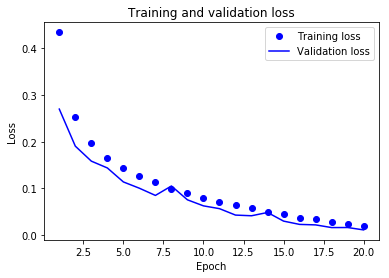

In [72]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' = "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' = "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

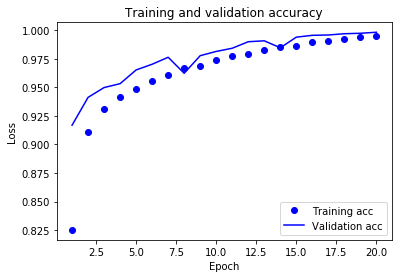

In [73]:
plt.clf()  # Clear Figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')  # 'bo' = "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')  # 'b' = "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
print("x_test, {} elements, format {} : {}".format(len(x_test), x_test.shape, x_test))
print("x_test[0]={}".format(x_test[0]))
prediction = model.predict(x_test)
print("Predictions:\n{}".format(prediction))

x_test, 25000 elements, format (25000, 10000) : [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
x_test[0]=[0. 1. 1. ... 0. 0. 0.]
Predictions:
[[0.00706011]
 [0.9999997 ]
 [0.99636376]
 ...
 [0.09425795]
 [0.00396037]
 [0.7787603 ]]


In [148]:
def predict_feeling(comment):
    words = comment.lower().split(' ')
    # print("Words: {}".format(words))
    tensor = []
    for word in words:
        try:
            # print("Word: {}, index: {}".format(word, word_index[word]))
            tensor.append(word_index[word])
        except KeyError as keyError:
            print("\t>> No such word {}, skipping.".format(word))
    big_tensor = []
    idx = 0
    while len(big_tensor) < 10000:  # Model takes 10000 words. We repeat them until we reach it.
        big_tensor.append(tensor[idx])
        idx += 1
        if idx >= len(tensor):
            idx = 0
    the_data =  vectorize_sequences(np.array(big_tensor).reshape((1, 10000)))
    # print("Tensor Shape: {}".format(the_data.shape))
    prediction = model.predict(the_data)
    # print("Predictions:\n{}".format(prediction))
    return prediction

comments = [
    "What a holly marvelous beautiful movie I just loved it agaga",
    "Horrible and badly disgusting made me sick",
    "Strongly sucks never again",
    "Very well done and played"
           ]
for comment in comments:
    print("For comment '{}', feeling is {}".format(comment, predict_feeling(comment)))


	>> No such word agaga, skipping.
For comment 'What a holly marvelous beautiful movie I just loved it agaga', feeling is [[0.96036834]]
For comment 'Horrible and badly disgusting made me sick', feeling is [[0.07285944]]
For comment 'Strongly sucks never again', feeling is [[0.39999363]]
For comment 'Very well done and played', feeling is [[0.733908]]
